ColDefs(
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '192A'
    name = 'SURVEY'; format = '35A'
    name = 'PROGRAMNAME'; format = '18A'
    name = 'NINST'; format = '3J'
    name = 'NVISITS'; format = 'J'
    name = 'COMBTYPE'; format = 'J'
    name = 'COMMISS'; format = 'I'
    name = 'SNR'; format = 'E'
    name = 'STARFLAG'; fo

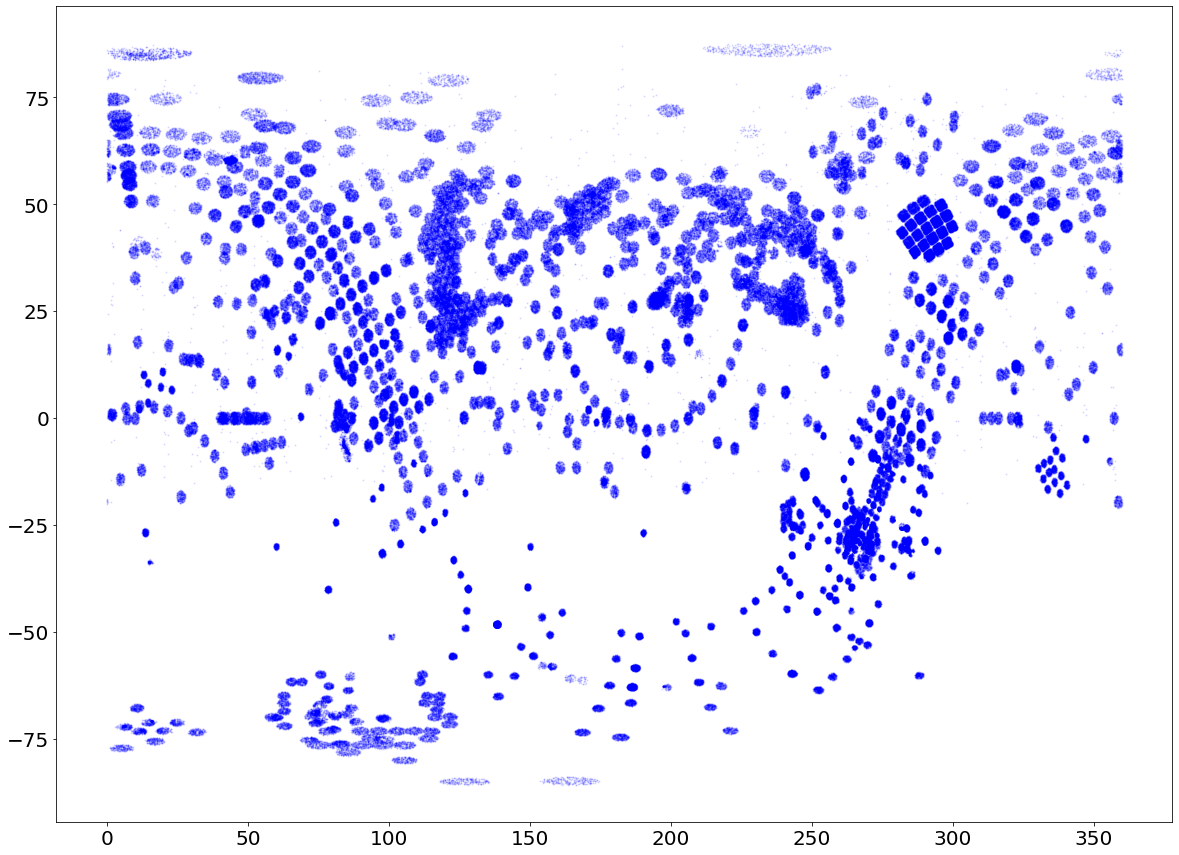

In [97]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(2*np.pi*b*x/360 + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStarLite-r12-l33.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
(np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['RA'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

<ipython-input-48-07541fab518a>:7: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


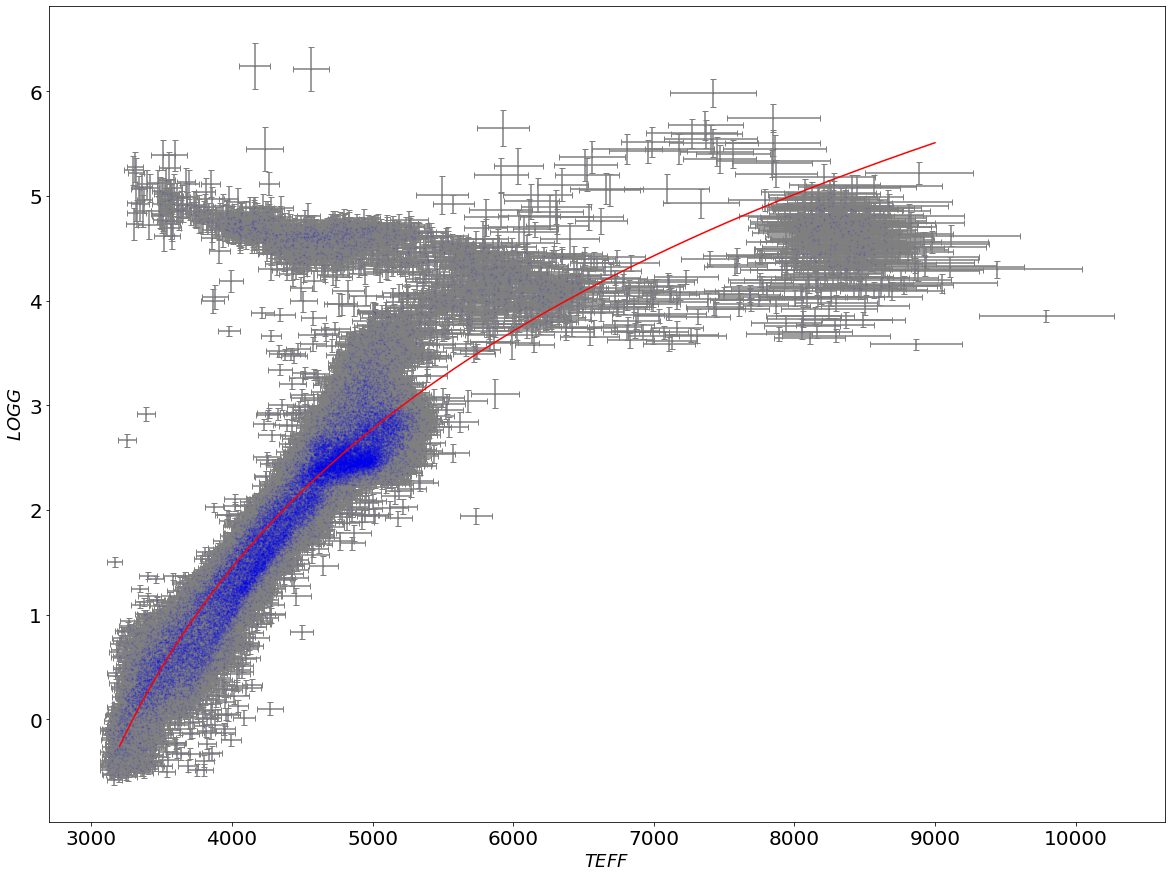

a: popt values are 3.168909215595113=a, 0.7344303666463552=b, -1525.9945574993517=c, and -21.532938506911908=d
b: log function
c: no because the points were so far out with big error bars so they were clearly bad points/didnt allow the log to work due to being a negative value


In [48]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

gd2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
      (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (abs(star['GLAT'])<= 1) &\
      (star['TEFF'] >= 2500) &\
      (star['LOGG'] >= -1)

good2 = np.where(gd2)[0]

xline = np.linspace(3200, 9000, 5000)           #steady graph

popt, pcov = opt.curve_fit(logfit, x1, y1)      #find specs of graph

fig = plt.figure(figsize=(20,15))               #plot graph
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][good2],star['LOGG'][good2],s=1,alpha=0.1, c='b')
ax.errorbar(star['TEFF'][good2],star['LOGG'][good2],xerr= star['TEFF_ERR'][good2], yerr= star['LOGG_ERR'][good2], c='tab:gray', 
            fmt='.', markersize=.5, capsize=3 ,zorder=0)
plt.plot(xline, logfit(xline, *popt), 'r-')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('$TEFF$', fontsize=18)
ax.set_ylabel('$LOGG$', fontsize=18)

plt.show()



print('a: popt values are 3.168909215595113=a, 0.7344303666463552=b, -1525.9945574993517=c, and -21.532938506911908=d')
print('b: log function')
print('c: no because the points were so far out with big error bars so they were clearly bad points/didnt allow the log to work due to being a negative value')

In [ ]:
gd2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
      (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (abs(star['GLAT']) >= 10) &\
      (star['TEFF']>=2500) &\
      (star['J'] >= -10) &\
      (star['K'] >= -10) &\
      (abs(star['J_ERR']) <= 50) &\
      (abs(star['K_ERR']) <= 50) &\
      (abs(star['TEFF_ERR']) <= 500)
good2 = np.where(gd2)[0]
logfit

xline = np.linspace(3200, 9000, 5000)
popt1,pcov1 = opt.curve_fit(poly3, star['TEFF'][good2], star['J'][good2])
popt2,pcov2 = opt.curve_fit(poly3, star['TEFF'][good2], star['K'][good2])

popt_avg = (popt1 + popt2)/2
print(popt_avg)
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][good2],star['K'][good2],s=1,c='orange',alpha=0.1)
ax.scatter(star['TEFF'][good2],star['J'][good2],s=1,c='orange',alpha=0.1)
plt.plot(xline, poly3(xline, *popt_avg), 'blue')

ax.errorbar(star['TEFF'][good2], star['K'][good2],xerr= star['TEFF_ERR'][good2], yerr=star['K_ERR'][good2], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.errorbar(star['TEFF'][good2], star['J'][good2],xerr= star['TEFF_ERR'][good2], yerr= star['J_ERR'][good2], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

#plt.xlim(2500,9000)
#plt.ylim(0,20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('$TEFF$', fontsize=18)
ax.set_ylabel('$J-K$', fontsize=18)
plt.show()

print('a: popt values are -2.27724659e-11=a, 2.39481185e-07 =b, -8.28625436e-04 =c, and  1.19461246e+01=d')
print('b: poly3')
print('c: yes because there is a cluster of points below the big lump')

[-2.27724659e-11  2.39481185e-07 -8.28625436e-04  1.19461246e+01]


[56.1537134   1.30029672  0.78132922  1.23521007]


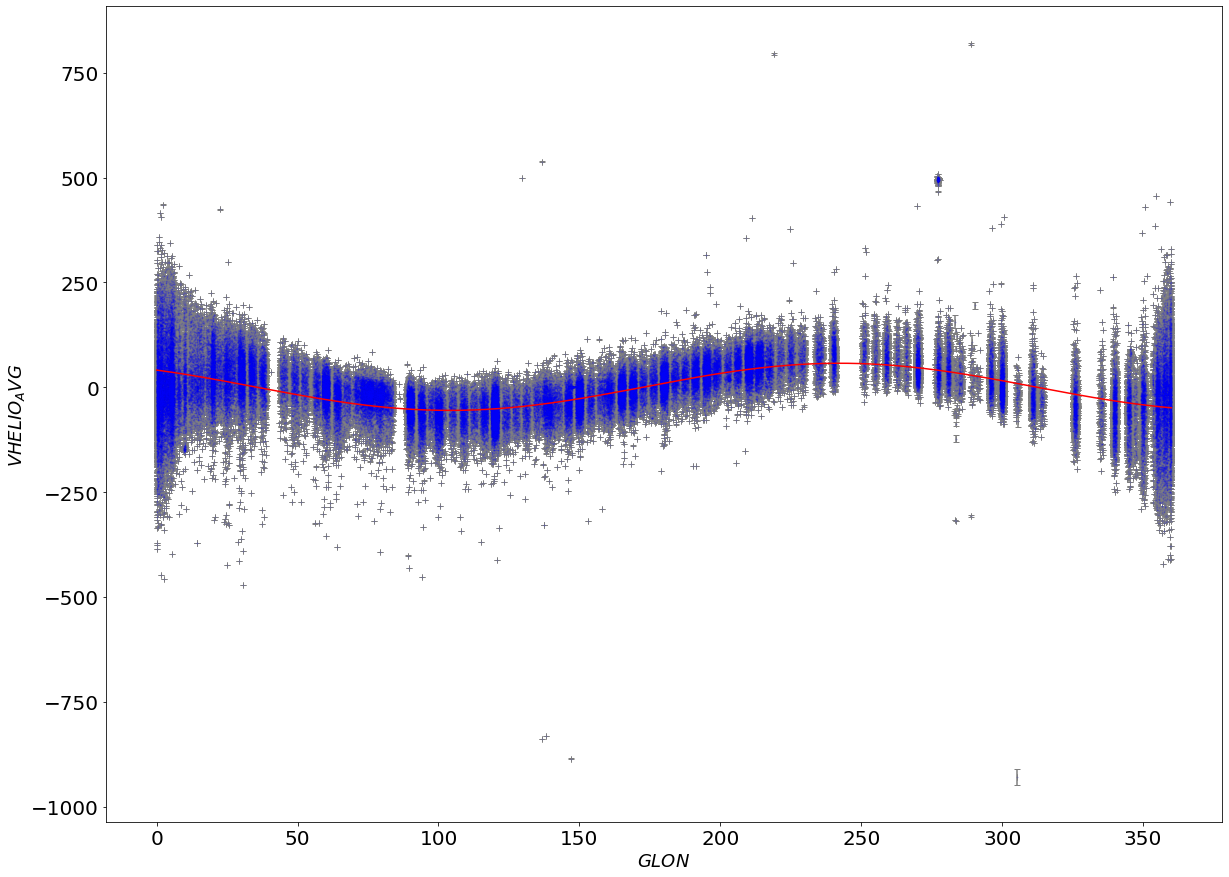

a: popt values are 56.1537134=a, 1.30029672=b, 0.78132922=c, and 1.23521007=d
b: cosine function
c: no because the points are pretty consistent and the outliars do not have a strong influence


In [53]:
gd3 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
      (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (abs(star['GLAT'])<= 10)
good3 = np.where(gd3)[0]



popt, pcov = opt.curve_fit(cosfit, star['GLON'][good3] , star['VHELIO_AVG'][good3])
xline = np.linspace(0, 360, 5000)
print(popt)
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['GLON'][good3],star['VHELIO_AVG'][good3],s=1,c='b',alpha=0.1)
ax.errorbar(star['GLON'][good3], star['VHELIO_AVG'][good3],xerr= 0, yerr=star['VERR'][good3], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
plt.plot(xline,cosfit(xline,*popt), color = 'r')

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('$GLON$', fontsize=18)
ax.set_ylabel('$VHELIO_AVG$', fontsize=18)
plt.show()



print('a: popt values are 56.1537134=a, 1.30029672=b, 0.78132922=c, and 1.23521007=d')
print('b: cosine function')
print('c: no because the points are pretty consistent and the outliars do not have a strong influence')

[ 0.11511111  0.167757   -0.14857714  0.03119565]


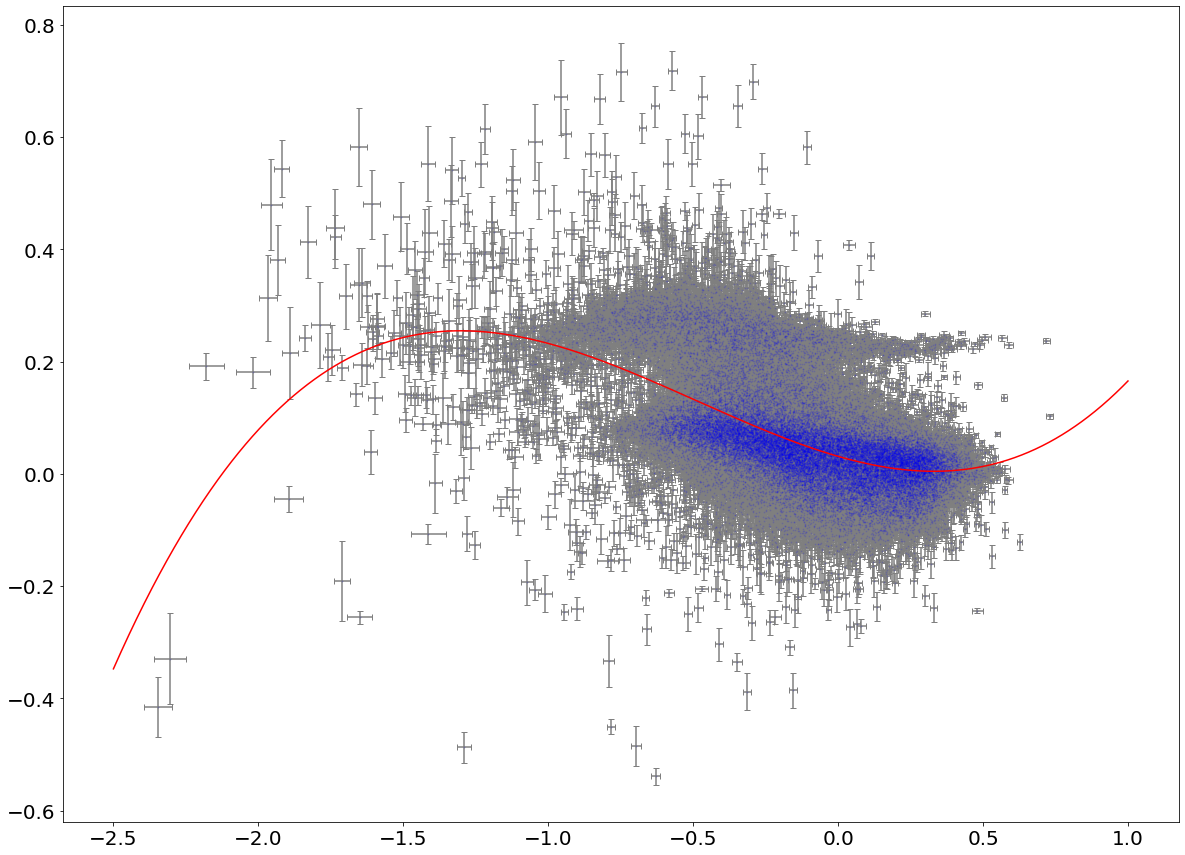

a: popt values are 0.11511111=a, 0.167757=b, -0.14857714=c, and 0.03119565=d
b: poly3 function
c: no because there arent really any other functions that would make sense in this context


In [75]:
gd4 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
      (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (abs(star['GLAT'])<= 2) &\
      (star['Fe_H']>=-2.5) &\
      (star['O_FE'] >= -1)

good4 = np.where(gd4)[0]

popt, pcov = opt.curve_fit(poly3, star['Fe_H'][good4] , star['O_FE'][good4])
xline = np.linspace(-2.5, 1, 2500)

print(popt)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['Fe_H'][good4],star['O_Fe'][good4],s=1,c='b',alpha=0.1)
ax.errorbar(star['Fe_H'][good4], star['O_Fe'][good4],xerr= star['Fe_H_ERR'][good4], yerr=star['O_Fe_ERR'][good4], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
plt.plot(xline,poly3(xline, *popt), 'r-')


ax.set_xlabel('$Fe_H$', fontsize=18)
ax.set_ylabel('$O_Fe$', fontsize=18)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()


print('a: popt values are 0.11511111=a, 0.167757=b, -0.14857714=c, and 0.03119565=d')
print('b: poly3 function')
print('c: no because there arent really any other functions that would make sense in this context')

[-0.0805418  -0.30749176  0.03310985]


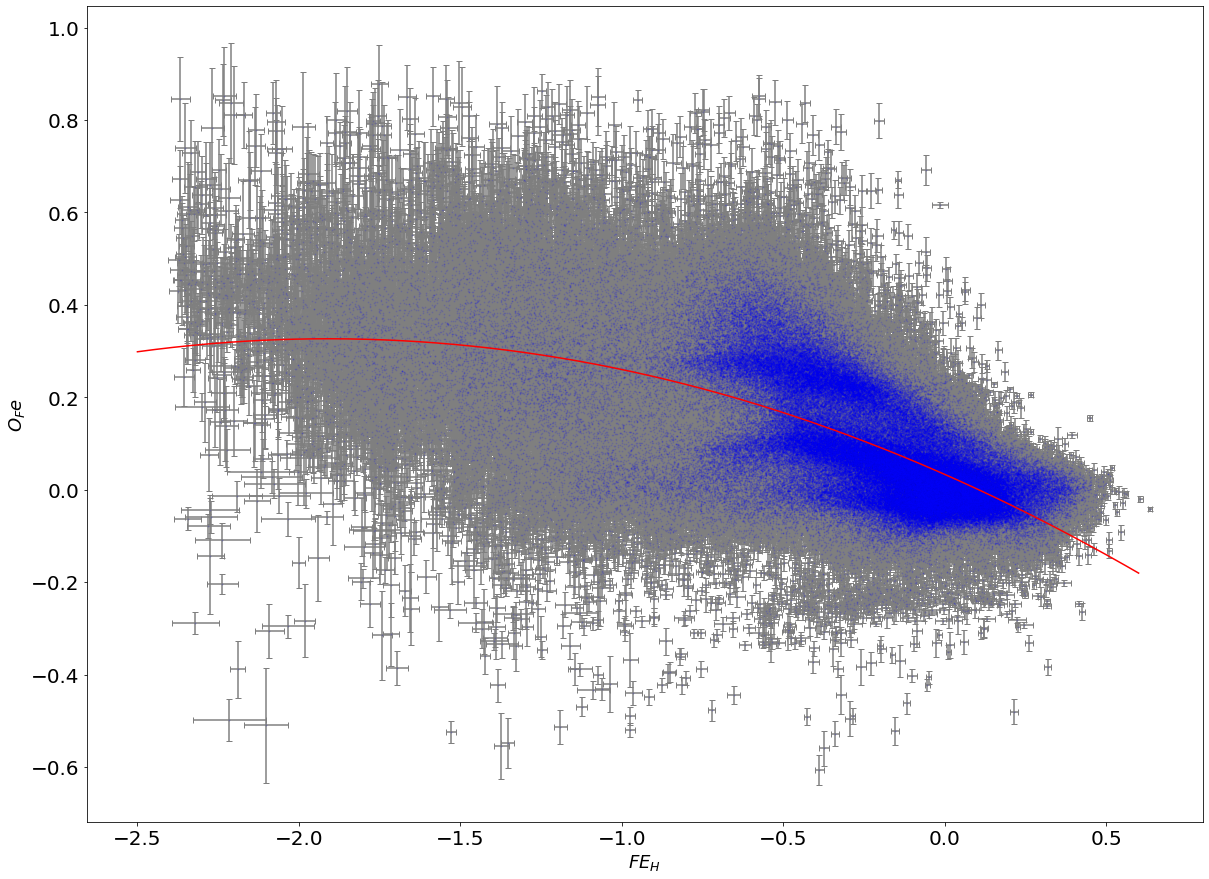

a: popt values are -0.0805418=a, -0.30749176=b, 0.03310985=c
b: poly2 function
c: yes because there is just a blob of points with a more dense blob on the farther side of it


In [113]:
gd5 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
      (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (abs(star['GLAT'])>= 10) &\
      (star['Fe_H']>=-2.5) &\
      (star['O_FE'] >= -1)

good5 = np.where(gd5)[0]

popt, pcov = opt.curve_fit(poly2, star['Fe_H'][good5] , star['O_FE'][good5])
#popt1, pcov1 = opt.curve_fit(lorentzian_cauchy, star['Fe_H'][good5] , star['O_FE'][good5])
xline = np.linspace(-2.5, .6, 2500)

print(popt)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['Fe_H'][good5],star['O_Fe'][good5],s=1,c='b',alpha=0.1)
ax.errorbar(star['Fe_H'][good5], star['O_Fe'][good5],xerr= star['Fe_H_ERR'][good5], yerr=star['O_Fe_ERR'][good5], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
plt.plot(xline, poly2(xline,*popt), color = 'r')
#plt.plot(xline, lorentzian_cauchy(xline,*popt1))


ax.set_xlabel('$FE_H$', fontsize=18)
ax.set_ylabel('$O_Fe$', fontsize=18)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()
print('a: popt values are -0.0805418=a, -0.30749176=b, 0.03310985=c')
print('b: poly2 function')
print('c: yes because there is just a blob of points with a more dense blob on the farther side of it')


[20.32919284  9.40279184  1.63733879]


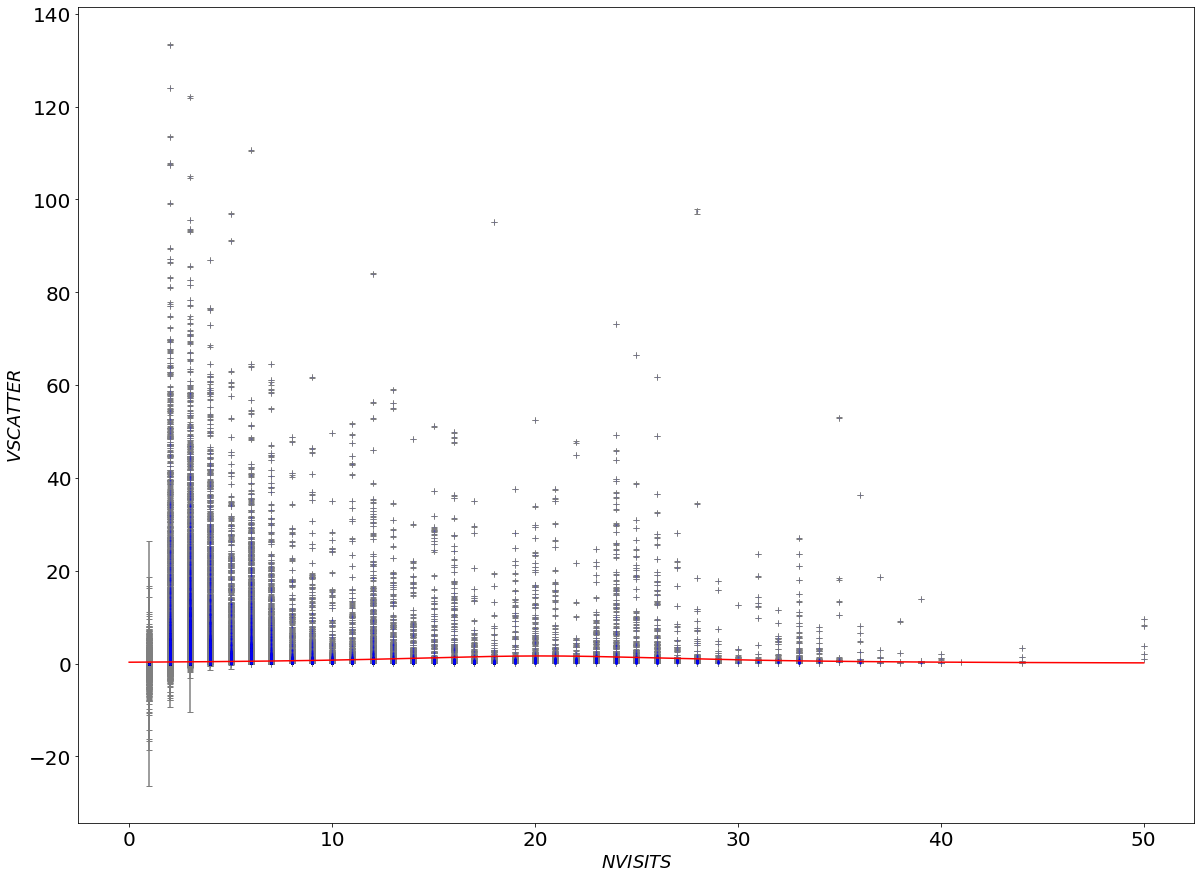

a: popt values are 20.32919284=a, 9.40279184=b, 1.63733879=c
b: Lorentzian_cauchy function/decay function
c: yes because the lorentzian shows the density of the points in the middle while a decay function would fit the outliars better


In [110]:
gd7 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
      (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['NVISITS'] >= 1)
good7 = np.where(gd7)[0]

popt, pcov = opt.curve_fit(lorentzian_cauchy, star['NVISITS'][good7] , star['VSCATTER'][good7])
xline = np.linspace(0, 50, 2500)

print(popt)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['NVISITS'][good7],star['VSCATTER'][good7],s=1,c='b',alpha=0.1)
ax.errorbar(star['NVISITS'][good7], star['VSCATTER'][good7],xerr= 0, yerr=star['VERR'][good7], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
plt.plot(xline, lorentzian_cauchy(xline, *popt), color = 'r')
ax.set_xlabel('$NVISITS$', fontsize=18)
ax.set_ylabel('$VSCATTER$', fontsize=18)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

print('a: popt values are 20.32919284=a, 9.40279184=b, 1.63733879=c')
print('b: Lorentzian_cauchy function/decay function')
print('c: yes because the lorentzian shows the density of the points in the middle while a decay function would fit the outliars better')


[0.17432678 0.23006971 0.04314861 0.0123674 ]


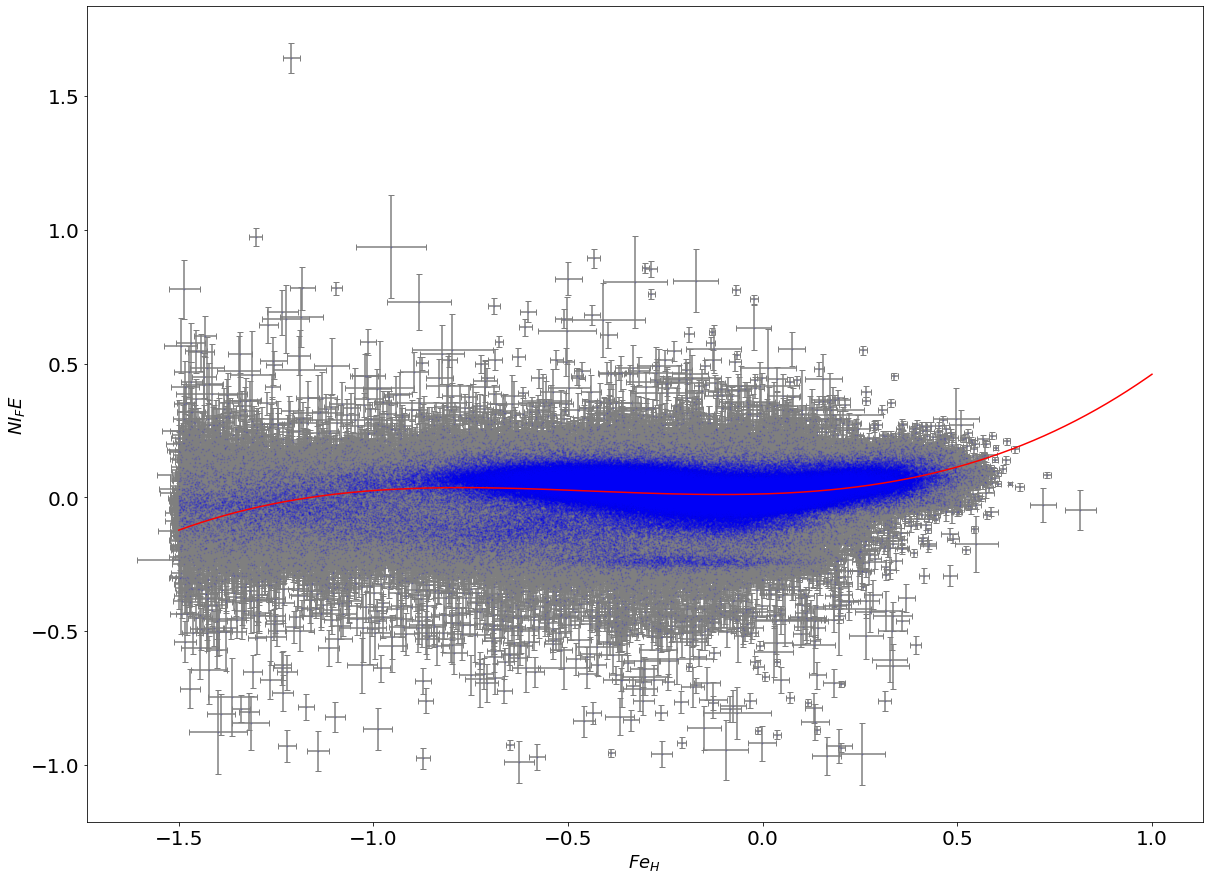

a: popt values are 0.17432678=a, 0.23006971=b, 0.04314861=c, and 0.0123674=d
b: poly3
c: yes because the points are just more dense in areas which convinced me this function graphs best fit was a poly3, but there is a function that might incorporate the outliars more


In [112]:
gd10 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
      (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
      (star['NI_FE']>=-1) &\
      (star['Fe_H']>=-1.5)
good10 = np.where(gd10)[0]


popt, pcov = opt.curve_fit(poly3, star['Fe_H'][good10] , star['NI_FE'][good10])
xline = np.linspace(-1.5, 1, 2500)

print(popt)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['Fe_H'][good10],star['NI_FE'][good10],s=1,c='b',alpha=0.1)
ax.errorbar(star['Fe_H'][good10], star['NI_FE'][good10],xerr= star['Fe_H_ERR'][good10], yerr=star['NI_FE_ERR'][good10], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
plt.plot(xline, poly3(xline, *popt), color = 'r')


ax.set_xlabel('$Fe_H$', fontsize=18)
ax.set_ylabel('$NI_FE$', fontsize=18)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

print('a: popt values are 0.17432678=a, 0.23006971=b, 0.04314861=c, and 0.0123674=d')
print('b: poly3')
print('c: yes because the points are just more dense in areas which convinced me this function graphs best fit was a poly3, but there is a function that might incorporate the outliars more')